In [10]:
import numpy as np
import pandas as pd
import json
import os
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
folder_path = "../data/TABMWP/tabmwp"
filename="problems_train.json"
file_path = os.path.join(folder_path, filename)
with open(file_path, "r", encoding="utf-8") as f:
    train_data = json.load(f)
train_data['1']

{'question': "The members of the local garden club tallied the number of plants in each person's garden. How many gardens have at least 47 plants?",
 'choices': None,
 'answer': '13',
 'unit': None,
 'table_title': 'Plants per garden',
 'table': 'Stem | Leaf \n3 | 3, 3, 3, 5, 5\n4 | 6\n5 | 4, 5, 7, 8\n6 | 7, 8\n7 | 2, 3, 7, 9\n8 | 6, 8, 9',
 'table_for_pd': {'Stem': ['3', '4', '5', '6', '7', '8'],
  'Leaf ': ['3, 3, 3, 5, 5',
   '6',
   '4, 5, 7, 8',
   '7, 8',
   '2, 3, 7, 9',
   '6, 8, 9']},
 'row_num': 7,
 'column_num': 2,
 'solution': 'Find the row with stem 4. Count all the leaves greater than or equal to 7.\n\nCount all the leaves in the rows with stems 5, 6, 7, and 8.\n\nYou counted 13 leaves, which are blue in the stem-and-leaf plots above. 13 gardens have at least 47 plants.',
 'ques_type': 'free_text',
 'ans_type': 'integer_number',
 'grade': 4,
 'split': 'train'}

In [12]:
folder_path = "../data/TABMWP/tabmwp"
filename="problems_test.json"
file_path = os.path.join(folder_path, filename)
with open(file_path, "r", encoding="utf-8") as f:
    test_data = json.load(f)

In [13]:
folder_path = "../data/TABMWP/tabmwp"
filename="problems_dev.json"
file_path = os.path.join(folder_path, filename)
with open(file_path, "r", encoding="utf-8") as f:
    dev_data = json.load(f)

In [14]:
print(f"Tổng số mẫu huấn luyện: {len(train_data)+len(dev_data)+len(test_data)}")
print(f"Tổng số mẫu tập train: {len(train_data)}")
print(f"Tổng số mẫu tập test: {len(test_data)}")
print(f"Tổng số mẫu tập dev: {len(dev_data)}")

Tổng số mẫu huấn luyện: 38431
Tổng số mẫu tập train: 23059
Tổng số mẫu tập test: 7686
Tổng số mẫu tập dev: 7686


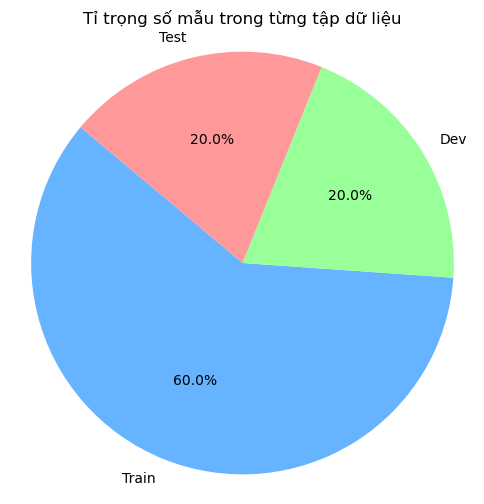

In [15]:
# Tính số lượng mẫu trong từng tập
sizes = [len(train_data), len(dev_data), len(test_data)]
labels = ['Train', 'Dev', 'Test']
colors = ['#66b3ff', '#99ff99', '#ff9999']  # Màu đẹp hơn
# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Tỉ trọng số mẫu trong từng tập dữ liệu')
plt.axis('equal')  # Đảm bảo hình tròn
plt.show()

In [16]:
train_data['1'].keys()

dict_keys(['question', 'choices', 'answer', 'unit', 'table_title', 'table', 'table_for_pd', 'row_num', 'column_num', 'solution', 'ques_type', 'ans_type', 'grade', 'split'])

In [17]:
df_list = []
for key in train_data.keys():
    # Chuyển mỗi mục thành DataFrame và thêm vào danh sách
    df_temp = pd.DataFrame([train_data[key]])
    df_list.append(df_temp)

# Kết hợp tất cả DataFrame trong danh sách thành một DataFrame duy nhất
df_train = pd.concat(df_list, ignore_index=True)

In [18]:
df_list = []
for key in test_data.keys():
    # Chuyển mỗi mục thành DataFrame và thêm vào danh sách
    df_temp = pd.DataFrame([test_data[key]])
    df_list.append(df_temp)

# Kết hợp tất cả DataFrame trong danh sách thành một DataFrame duy nhất
df_test = pd.concat(df_list, ignore_index=True)

In [19]:
df_list = []
for key in dev_data.keys():
    # Chuyển mỗi mục thành DataFrame và thêm vào danh sách
    df_temp = pd.DataFrame([dev_data[key]])
    df_list.append(df_temp)

# Kết hợp tất cả DataFrame trong danh sách thành một DataFrame duy nhất
df_dev = pd.concat(df_list, ignore_index=True)

In [20]:
df_train[:5]

,question,choices,answer,unit,table_title,table,table_for_pd,row_num,column_num,solution,ques_type,ans_type,grade,split
0,The members of the local garden club tallied t...,None,13,None,Plants per garden,"Stem | Leaf \n3 | 3, 3, 3, 5, 5\n4 | 6\n5 | 4,...","{'Stem': ['3', '4', '5', '6', '7', '8'], 'Leaf...",7,2,Find the row with stem 4. Count all the leaves...,free_text,integer_number,4,train
1,The transportation company tracked the number ...,"[Friday, Saturday, Sunday, Monday]",Friday,None,Train tickets sold,Day | Number of tickets\nFriday | 71\nSaturday...,"{'Day': ['Friday', 'Saturday', 'Sunday', 'Mond...",5,2,Find the least number in the table. Remember t...,multi_choice,extractive_text,2,train
2,The Burlington Symphony categorizes its donors...,None,58/141,None,Donor levels,Donation level | Number of donors\nGold | 15\n...,"{'Donation level': ['Gold', 'Silver', 'Bronze'...",4,2,Find how many donors are at the bronze level.\...,free_text,decimal_number,7,train
3,Employees at Eve's Movies tracked the number o...,None,44,None,Renting movies last month,Number of times | Frequency\n0 | 1\n1 | 18\n2 ...,"{'Number of times': ['0', '1', '2', '3', '4'],...",6,2,Add the frequencies for each row.\n\nAdd:\n\n1...,free_text,integer_number,7,train
4,A hardware store monitored how many hammers it...,None,7,None,Hammers sold,Day | Number of hammers\nThursday | 7\nFriday ...,"{'Day': ['Thursday', 'Friday', 'Saturday', 'Su...",7,2,"Read the numbers from the table.\n\n7, 6, 6, 9...",free_text,integer_number,6,train


In [21]:
df = pd.concat([df_train, df_test, df_dev], ignore_index=True)

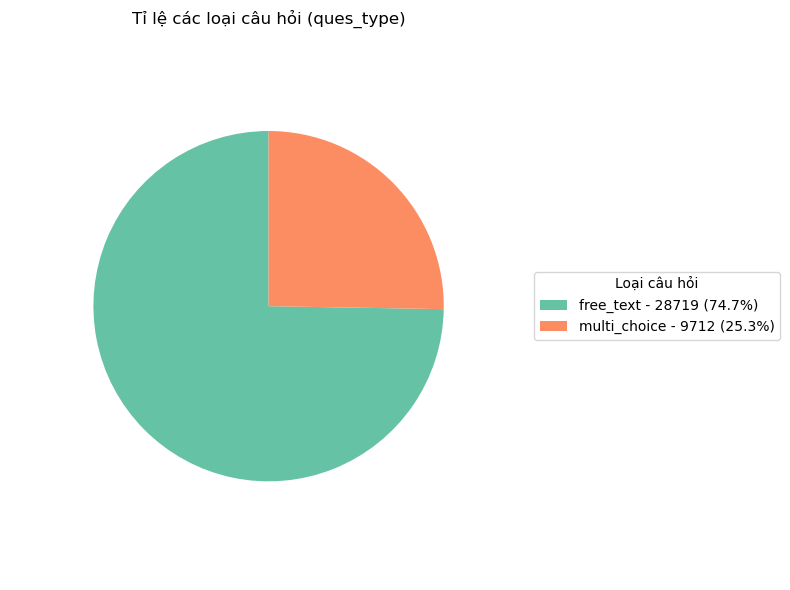

In [22]:
ques_counts = df['ques_type'].value_counts()
labels = ques_counts.index
sizes = ques_counts.values
colors = sns.color_palette("Set2", n_colors=len(labels))

plt.figure(figsize=(8, 6))
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.axis('equal')
# Thêm chú thích bên cạnh (legend)
plt.legend(patches, [f'{l} - {s} ({s/sum(sizes)*100:.1f}%)' for l, s in zip(labels, sizes)],
           loc='center left', bbox_to_anchor=(1, 0.5), title='Loại câu hỏi')
plt.title('Tỉ lệ các loại câu hỏi (ques_type)')
plt.tight_layout()
plt.show()


In [25]:
df['word_count_question'] = df['question'].apply(lambda x: len(str(x).split()))

# Tính trung bình số từ
average_word_count = df['word_count_question'].mean()

print(f"Trung bình số từ trong cột 'question': {average_word_count} từ")

Trung bình số từ trong cột 'question': 22.098696364913742 từ


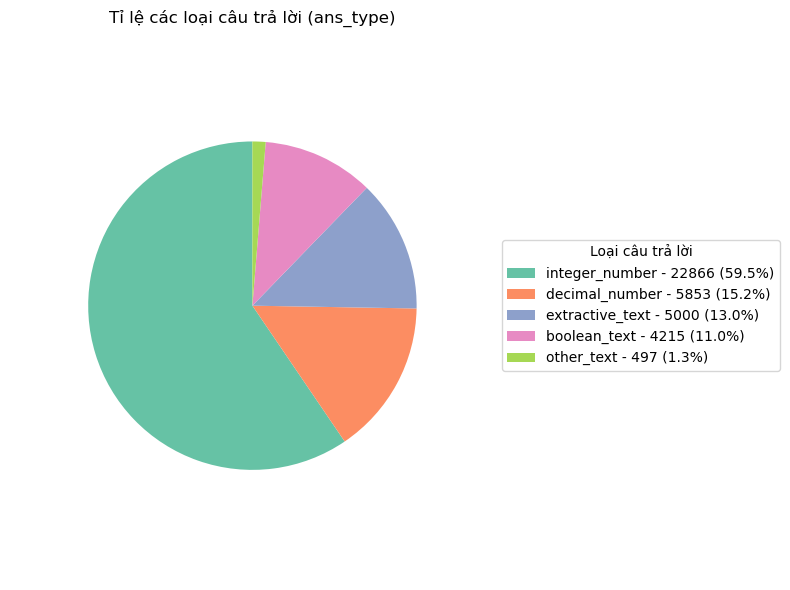

In [ ]:
ans_counts = df['ans_type'].value_counts()
labels = ans_counts.index
sizes = ans_counts.values

# Màu từ seaborn
colors = sns.color_palette("Set2", n_colors=len(labels))

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.axis('equal')
# Thêm chú thích bên cạnh (legend)
plt.legend(patches, [f'{l} - {s} ({s/sum(sizes)*100:.1f}%)' for l, s in zip(labels, sizes)],
           loc='center left', bbox_to_anchor=(1, 0.5), title='Loại câu trả lời')
plt.title('Tỉ lệ các loại câu trả lời (ans_type)')
plt.tight_layout()
plt.show()

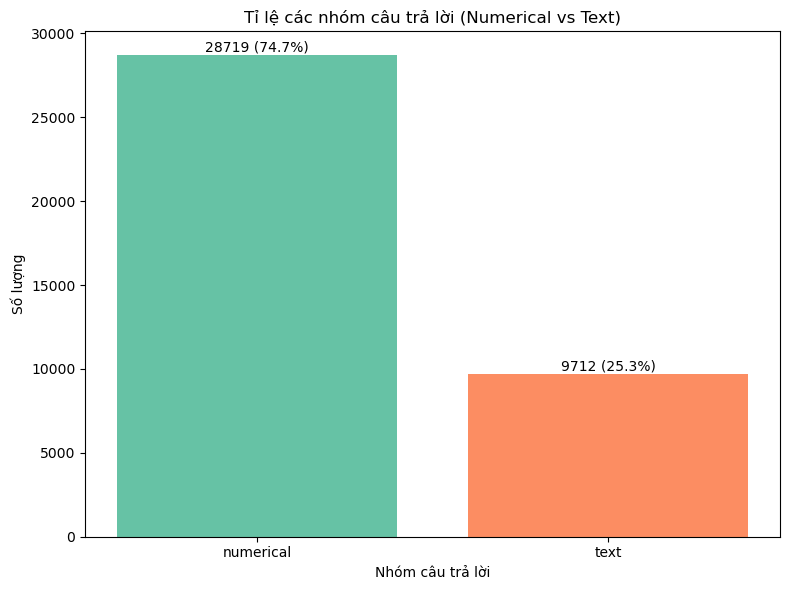

In [ ]:

# Hàm để gộp nhóm ans_type thành "numerical" và "text"
def group_ans_type(value):
    numerical_types = ['integer_number', 'decimal_number']  # Thêm các giá trị thuộc nhóm numerical
    text_types = ['extractive_text', 'boolean_text', 'other_text']  # Thêm các giá trị thuộc nhóm text
    if value in numerical_types:
        return 'numerical'
    elif value in text_types:
        return 'text'
    else:
        return 'other'  # Trường hợp không xác định

# Áp dụng gộp nhóm
df['ans_group'] = df['ans_type'].apply(group_ans_type)

# Đếm số lượng cho mỗi nhóm
ans_counts = df['ans_group'].value_counts()
labels = ans_counts.index
sizes = ans_counts.values

# Lấy màu từ bảng màu Seaborn "Set2"
colors = sns.color_palette("Set2", n_colors=len(labels))

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, sizes, color=colors)
plt.title('Tỉ lệ các nhóm câu trả lời (Numerical vs Text)')
plt.xlabel('Nhóm câu trả lời')
plt.ylabel('Số lượng')
plt.tight_layout()

# Thêm giá trị và phần trăm lên trên cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{int(height)} ({height/sum(sizes)*100:.1f}%)',
             ha='center', va='bottom')

plt.show()

In [ ]:
df['word_count_answer'] = df['answer'].apply(lambda x: len(str(x).split()))

# Tính trung bình số từ
average_word_count = df['word_count_answer'].mean()

print(f"Trung bình số từ trong cột 'answer': {average_word_count} từ")

Trung bình số từ trong cột 'answer': 1.1080117613385028 từ


In [ ]:
print("Có",len(df['solution'].unique()),"lời giải khác nhau")
df['word_count_solution'] = df['solution'].apply(lambda x: len(str(x).split()))
print("Trung bình lời giải có",df['word_count_solution'].mean(),"từ")

Có 35442 lời giải khác nhau
Trung bình lời giải có 49.45635034217168 từ


In [ ]:
def count_table_dimensions(table_str):
    try:
        rows = table_str.strip().split('\n')
        num_rows = len(rows)
        num_columns = max(len(row.split('|')) for row in rows)
        num_cells = num_rows * num_columns
        return pd.Series([num_rows, num_columns, num_cells])
    except:
        return pd.Series([0, 0, 0])  # Trường hợp dữ liệu rỗng hoặc lỗi

# Áp dụng cho toàn bộ cột
df[['num_rows', 'num_columns', 'num_cells']] = df['table'].apply(count_table_dimensions)


In [ ]:
print('Trung bình bảng có',df['num_rows'].mean(),'hàng')
print('Trung bình bảng có',df['num_columns'].mean(),'cột')
print('Trung bình bảng có',df['num_cells'].mean(),'ô')

Trung bình bảng có 5.86682626005048 hàng
Trung bình bảng có 2.2009575603028804 cột
Trung bình bảng có 12.86682626005048 ô


C:\Users\HP\AppData\Local\Temp\ipykernel_10808\235681279.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='grade', palette='viridis')


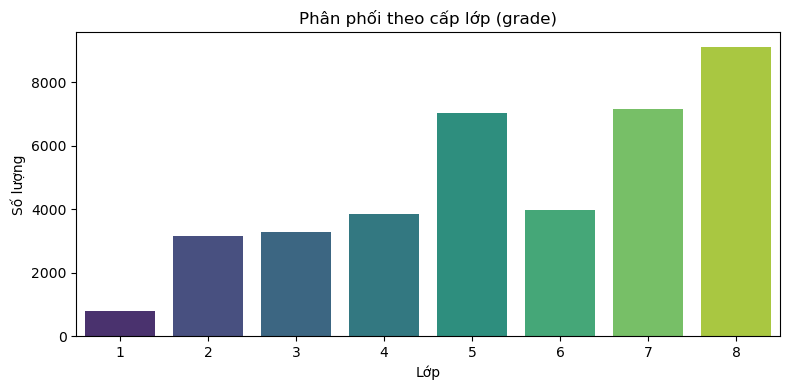

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='grade', palette='viridis')
plt.title('Phân phối theo cấp lớp (grade)')
plt.xlabel('Lớp')
plt.ylabel('Số lượng')
plt.tight_layout()
plt.show()